BUSINESS PROBLEM

“We’re onboarding a new client next month as part of a very large deal. It’s critical that we support them with our excellent service levels. I need to know how many tickets per week on average we can expect from this client so we can ensure we have enough help desk resources in place.”

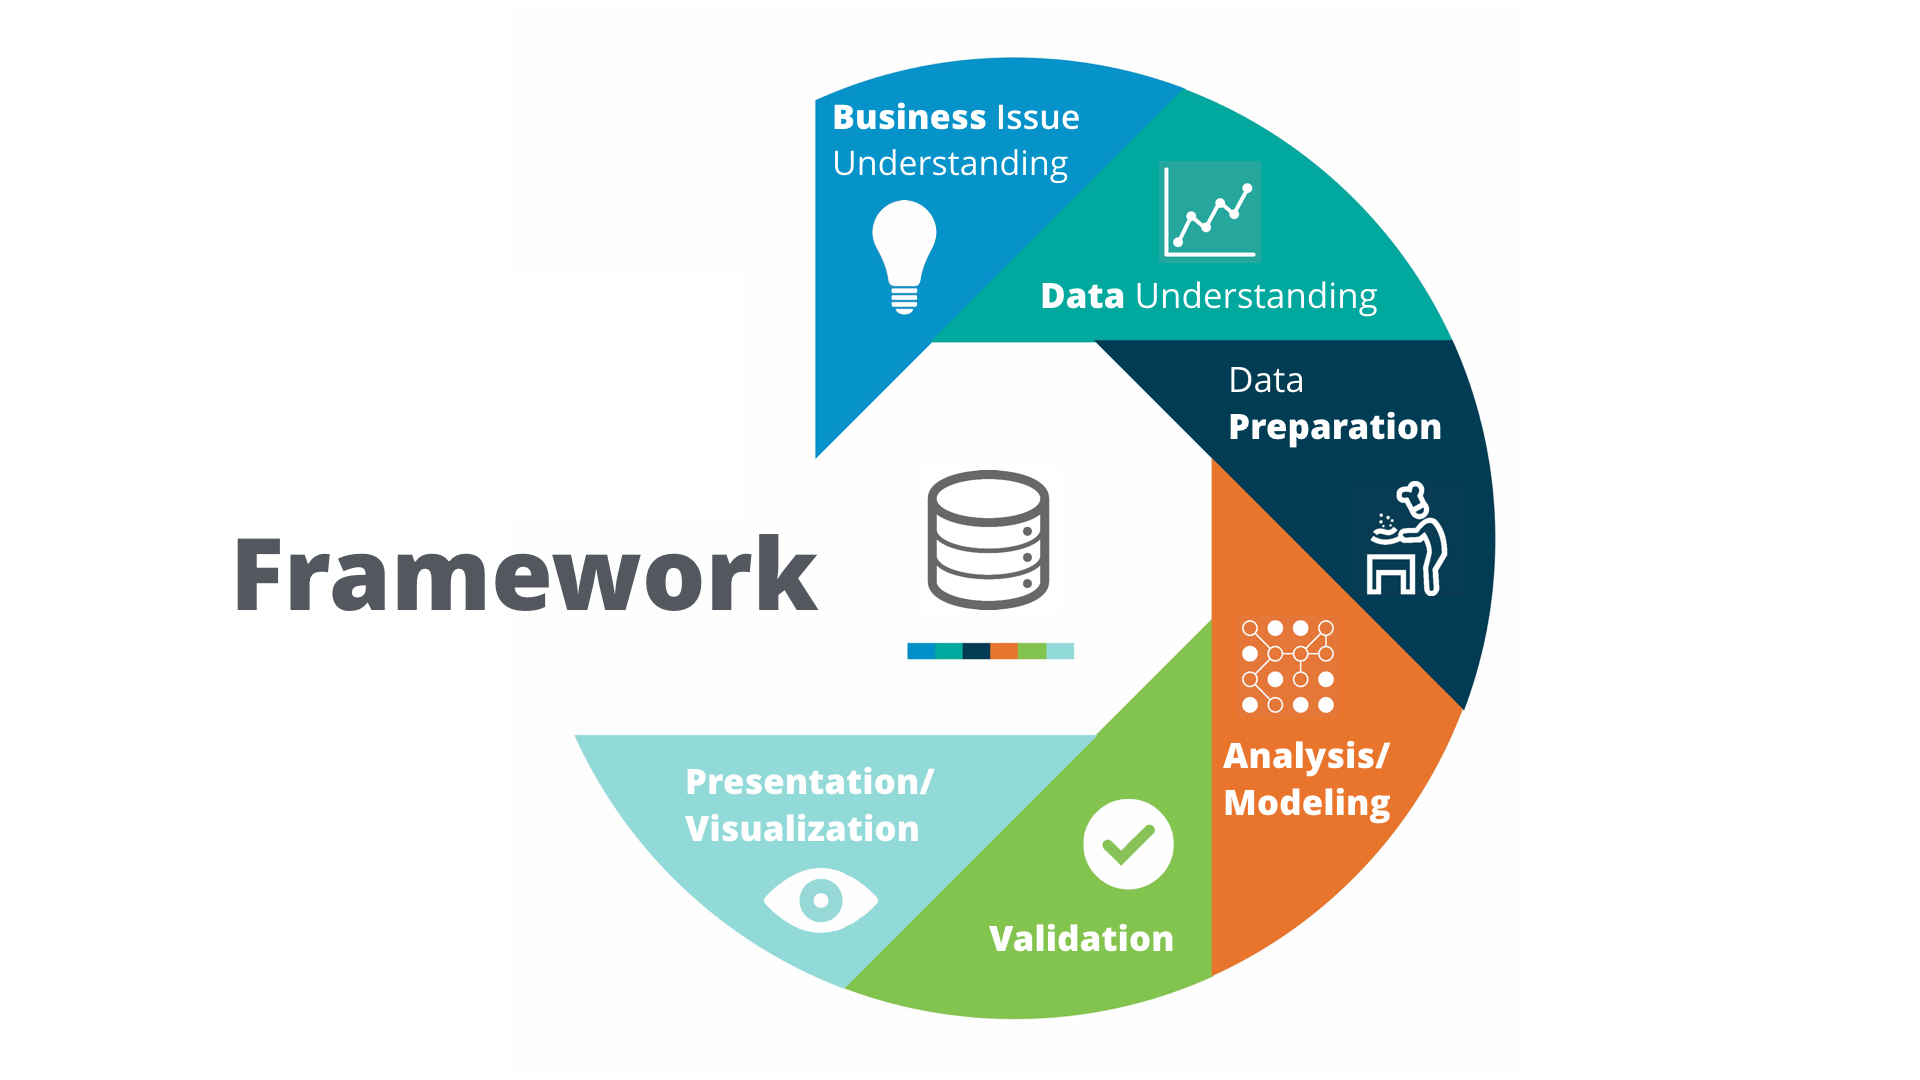

In [2]:
from IPython.display import Image
Image(filename='crisp-dm-framework.jpeg') 

Image above (crisp-dm-framework.jpeg) represents **CR**oss **I**ndustry **S**tandard **P**rocess for **D**ata **M**ining (CRISP-DM) aka The Problem Solving Framework.

First step in this framework is to understand a business issue. We should answer the following three questions:

    1) What decision needs to be made?
    2) What information is needed to inform that decision?
    3) What type of analysis is needed to get the information needed to make that decision?

What decisions need to be made?

The decision the sales manager needs to make is, “Do we have enough capacity on the support team to handle the support tickets from the new customer?” and “If not, how many people do we need to add to the support team to reach the desired capacity?”


What information do we need to inform this decision?

We need to calculate the average number of tickets per customer per week. We can then aggregate the average number of tickets for each customer to get a total average number of support tickets that we predict will be submitted per week. Once we have this information, we need to compare the predicted average number of tickets with the current capacity of the support staff, specifically, the average number of tickets each team member can handle.


What type of analysis is needed to get the information needed to make that decision?

Let’s use our Methodology Map flowchart (image below; methodology-map.jpg) to help us determine the type of analysis we should use to provide the exact information needed to inform the decision. We want to predict the average number of tickets per week a new customer will submit. Therefore, we’re looking to predict an outcome - that was easy. Because we have past data on the variable we're trying to predict, then we are data rich. As our target outcome is a number indicationg the average number of tickets we can expect per client, we should use a Numeric Model. At the end, we just want an average per week and are not interested in a specific calendar week. Therefore, we will use a continuous model to solve our problem.

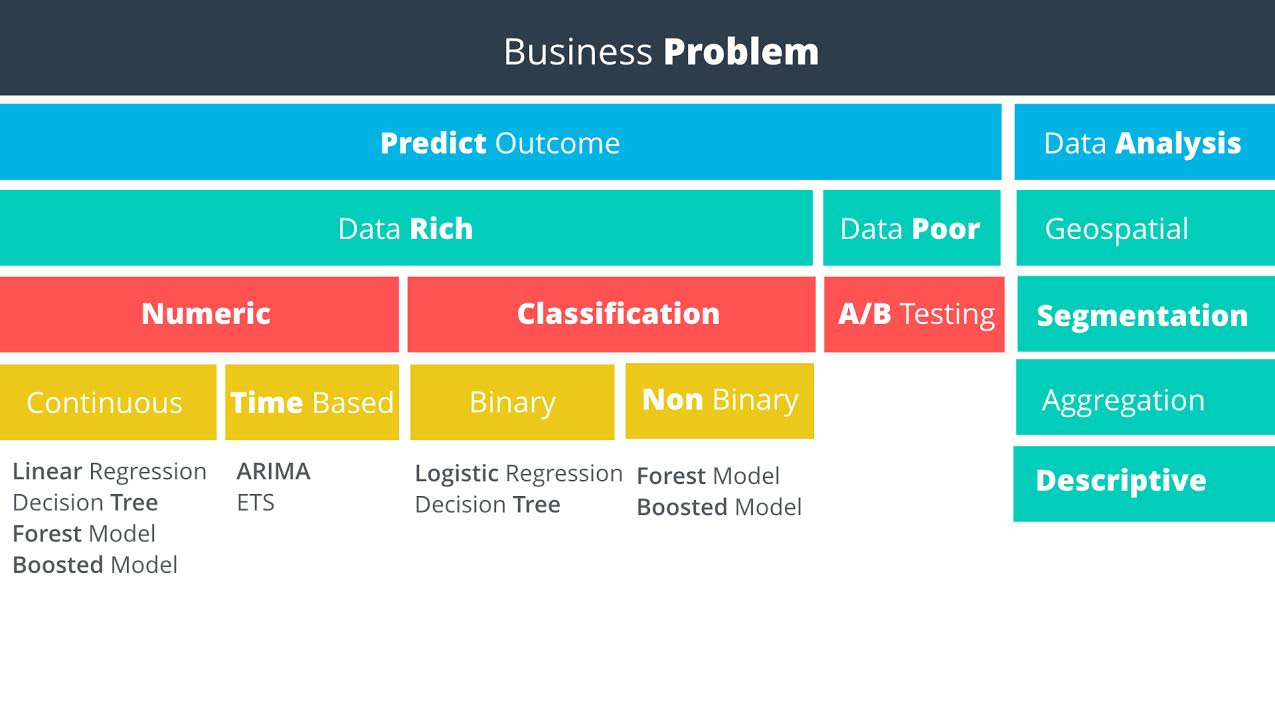

In [3]:
from IPython.display import Image
Image(filename='methodology-map.jpg') 

Sometimes, within the first step of our framework, we also conduct and the second one (Data Understanding). Third step, Data Preparation, will be skipped in this example. That being said, our next step is an Analysis aka Modeling. In this case we'll use a multiple linear regression. There are other options like Decision Tree, Forest or Boosted Model, etc. but we'll stick with linear regression.

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')

In [18]:
df = pd.read_excel('linear-example-data.xlsx') 
df.head()

,Average Number of Tickets,Number of Employees,Value of Contract,Industry
0,1,51,25750,Retail
1,9,68,25000,Services
2,20,67,40000,Services
3,1,124,35000,Retail
4,8,124,25000,Manufacturing


In [19]:
predictors = df.drop('Average Number of Tickets', axis=1)
target = df['Average Number of Tickets']

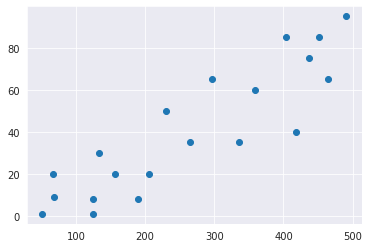

In [20]:
plt.scatter(predictors['Number of Employees'], target)
plt.show()

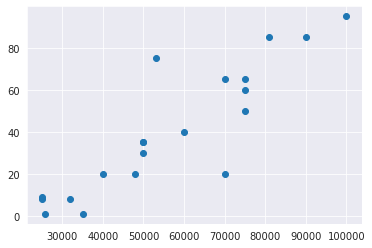

In [21]:
plt.scatter(predictors['Value of Contract'], target)
plt.show()

In [22]:
#Pearson correlation coefficient
df.corr()

,Average Number of Tickets,Number of Employees,Value of Contract
Average Number of Tickets,1.000000,0.886683,0.885818
Number of Employees,0.886683,1.000000,0.789888
Value of Contract,0.885818,0.789888,1.000000


Linear regression models assume that our numerical predictor variables should have linear relationship with the target variable. So it's good practice to analyze individual variables first before you run your variables through the linear regression model.

In [23]:
df.Industry.value_counts()

Services         8
Retail           7
Manufacturing    5
Name: Industry, dtype: int64

As we can see above, there are 3 unique terms in Industry variable.
If you have k unique terms, you use k - 1 dummy variables to represent. That being said, we'll have 2 dummy variables.

In [24]:
df = pd.get_dummies(df, columns=['Industry'], drop_first=True)

In [25]:
df

,Average Number of Tickets,Number of Employees,Value of Contract,Industry_Retail,Industry_Services
0,1,51,25750,1,0
1,9,68,25000,0,1
2,20,67,40000,0,1
3,1,124,35000,1,0
4,8,124,25000,0,0
5,30,134,50000,0,1
6,20,157,48000,1,0
7,8,190,32000,1,0
8,20,205,70000,1,0
9,50,230,75000,0,0


The manufacturing class is a reference/basis group

In [26]:
predictors = df.drop('Average Number of Tickets', axis=1)

In [27]:
import statsmodels.api as sm

In [28]:
predictors_const = sm.add_constant(predictors)
mod = sm.OLS(target, predictors_const)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Average Number of Tickets   R-squared:                       0.965
Model:                                   OLS   Adj. R-squared:                  0.956
Method:                        Least Squares   F-statistic:                     103.7
Date:                       Sat, 01 Aug 2020   Prob (F-statistic):           9.69e-11
Time:                               16:43:03   Log-Likelihood:                -62.537
No. Observations:                         20   AIC:                             135.1
Df Residuals:                             15   BIC:                             140.1
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -18.4504      4.765     -3.872      0.002     -28.606      -8.295
Number of Employees     0.1116      0.016      6.886      0.000       0.077       0.146
Value of Contract       0.0005      0.000      4.387      0.001       0.000       0.001
Industry_Retail        -8.7254      3.756     -2.323      0.035     -16.731      -0.720
Industry_Services      12.4938      3.700      3.377      0.004       4.607      20.380
==============================================================================
Omnibus:                        0.884   Durbin-Watson:                   2.835
Prob(Omnibus):                  0.643   Jarque-Bera (JB):                0.716
Skew:                          -0.010   Prob(JB):                        0.699
Kurtosis:                       2.073   Cond. No.                     2.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We'll not going into details with this OLS Regression Results, but looking to the R-squared, Adj. R-squared, F-statistic, Prob (F-statistic) from the first table and the coef and P>|t| columns from the second table we can conclude that our Regression model is representative and statistically significant at 95% significance level.

In [31]:
y_pred = res.predict(predictors_const)

In [32]:
residuals = target - y_pred

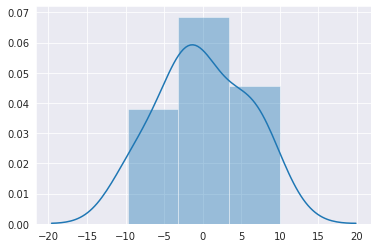

In [33]:
sns.distplot(residuals)

In [36]:
residuals.mean()

-3.1091129670812735e-12

In [42]:
#Shapiro-Wilk test for normality
from scipy.stats import shapiro, probplot

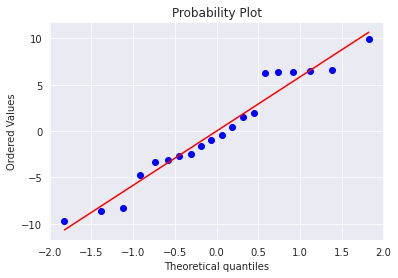

In [45]:
fig, ax = plt.subplots()
probplot(residuals, plot=ax, fit=True)
plt.show()

In [40]:
shapiro(residuals)

(0.9489314556121826, 0.35116079449653625)

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. As the p-value is 0.35, we can't reject null hypothesis.

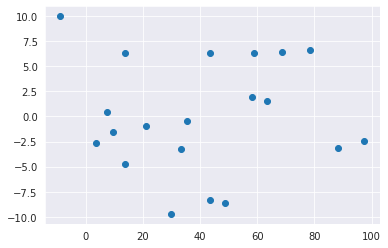

In [47]:
fig, ax = plt.subplots()
ax.scatter(y_pred, residuals)
plt.show()

Going back to our problem - here is the additional information we have:

The new client has 732 employees, with a contract value that is worth $825,000, and is in the services industry.
Your company currently has 23 help desk resources on staff, and each resource has a capacity of 125 tickets per week.
The current average number of tickets that the help desk has been receiving is 2800 per week.

By looking the additional informations we have (above), our regression model looks like: 

y_hat = -18.4504 + 0.1116 * Number of Employees + 0.0005 * Value of Contract - 12.4938 * Industry_Services

In [98]:
import numpy as np
X = np.array([1, 732, 825000, 0, 1])

In [99]:
y_hat = res.predict(X)
y_hat

array([476.54154033])

Main question was: How many tickets per week on average can we expect from this client?

Answer is 477.

Our company currently has 23 help desk resources on staff, and each resource has a capacity of 125 tickets per week. Therefore, the help desk can handle 2875 tickets per week. The current average number of tickets that the help desk has been receiving is 2800 per week. We currently have excess capacity of 75 tickets per week. The new client will need support for 477 tickets per week, so we don’t have enough capacity to support the new client. We need enough resources for 402 additional tickets per week, or 402/125 = 3.216 resources. Therefore, we need to add 4 additional resources.